# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
#Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bnb = pd.read_csv('./airbnb_hw.csv', low_memory=False)
price = bnb['Price']
price = price.str.replace(',','') #getting rid of the commas in numbers over 999
price = pd.to_numeric(price,errors='coerce') #converting all the values to numerics
bnb['Price'] = price
del price
print(sum(bnb['Price']))

4985888


In [3]:
zipcode = bnb['Zipcode']
zipcode = zipcode.replace('.0','') #getting rid of the .0 in the zipcode values
zipcode = pd.to_numeric(zipcode,errors='coerce') #converting all the values to numerics
bnb['Zipcode'] = zipcode
del zipcode
print(sum(bnb['Zipcode']))

nan


In [4]:
bnb_crosstab = pd.crosstab(bnb['Room Type'], bnb['Property Type'])
bnb_crosstab

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: xlabel='Price', ylabel='Count'>

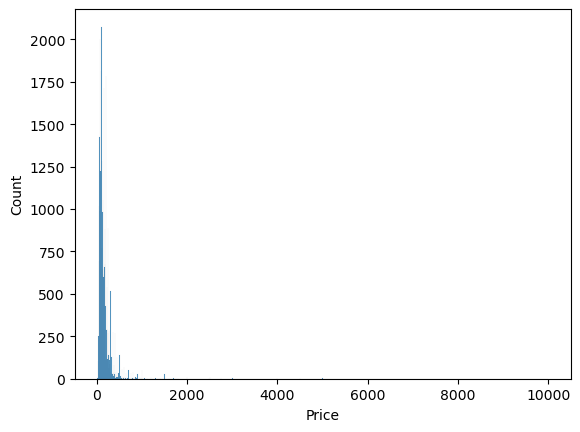

In [5]:
sns.histplot(data=bnb,x='Price')

In [6]:
bnb['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: xlabel='Beds', ylabel='Price'>

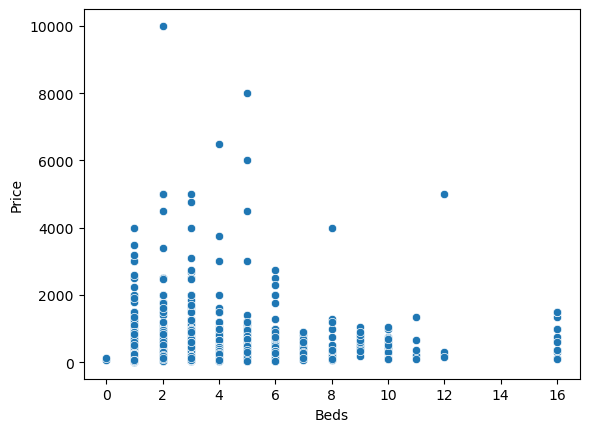

In [7]:
sns.scatterplot(data=bnb,y='Price',x='Beds')

<Axes: xlabel='Price_log', ylabel='Count'>

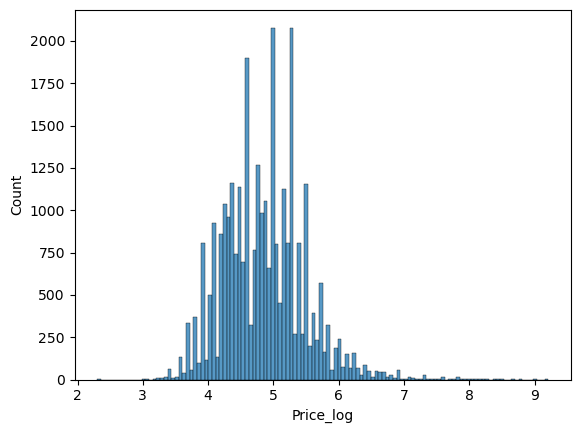

In [8]:
#Part 2

bnb['Price_log'] = np.log(bnb['Price'])
sns.histplot(data=bnb,x='Price_log')

In [9]:
bnb['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

In [10]:
beds = bnb['Beds']
beds = pd.to_numeric(beds,errors='coerce') #converting all the values to numerics
bnb['Beds'] = beds
del beds
bnb.dropna(inplace=True)

In [11]:
#Part 3

from sklearn.model_selection import train_test_split
y = bnb['Price']
X = bnb.loc[:,['Beds', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [12]:
#Part 4
from sklearn import linear_model
Z_train = pd.concat([X_train['Beds'], pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Beds'], pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
print('R^2 test: ', regression.score(Z_test,y_test))
print('R^2 train: ', regression.score(Z_train,y_train))

y_hat_test = regression.predict(Z_test)
y_hat_train = regression.predict(Z_train)
rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE test: ', rmse_test)
print('RMSE train: ', rmse_train)

coef = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
coef

R^2 test:  0.2684206711171696
R^2 train:  0.17577690902531828
RMSE test:  96.64258261364563
RMSE train:  142.2581904436082


,variable,coefficient
0,Beds,54.498296
1,Bronx,-9.585038
2,Brooklyn,40.639123
3,Manhattan,101.327086
4,Queens,11.144532
5,Staten Island,48.206208


In [13]:
y = bnb['Price']
X = bnb.loc[:,['Beds', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Z_train = pd.concat([X_train['Beds'], pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Beds'], pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
print('R^2 test: ', regression.score(Z_test,y_test))
print('R^2 train: ', regression.score(Z_train,y_train))

y_hat_test = regression.predict(Z_test)
y_hat_train = regression.predict(Z_train)
rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE test: ', rmse_test)
print('RMSE train: ', rmse_train)

coef = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
coef

R^2 test:  0.318718287022267
R^2 train:  0.20350849998975584
RMSE test:  93.26123885708641
RMSE train:  139.84452371418038


,variable,coefficient
0,Beds,40.282116
1,Entire home/apt,130.758522
2,Private room,41.769912
3,Shared room,9.828239


> My model that regressed Price on Beds and Room Type did the best

In [14]:
#Part 5

y = bnb['Price_log']
X = bnb.loc[:,['Beds', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Z_train = pd.concat([X_train['Beds'], pd.get_dummies(X_train['Neighbourhood '], dtype='int'), pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Beds'],  pd.get_dummies(X_test['Neighbourhood '], dtype='int'), pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
print('R^2 test: ', regression.score(Z_test,y_test))
print('R^2 train: ', regression.score(Z_train,y_train))

y_hat_test = regression.predict(Z_test)
y_hat_train = regression.predict(Z_train)
rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE test: ', rmse_test)
print('RMSE train: ', rmse_train)

coef = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
coef

R^2 test:  0.5854861296200001
R^2 train:  0.5793830803192841
RMSE test:  0.37288355344285007
RMSE train:  0.3814887176287743


,variable,coefficient
0,Beds,1.387497e-01
1,Bronx,-3.773269e+11
2,Brooklyn,-3.773269e+11
3,Manhattan,-3.773269e+11
4,Queens,-3.773269e+11
5,Staten Island,-3.773269e+11
6,Entire home/apt,3.773269e+11
7,Private room,3.773269e+11
8,Shared room,3.773269e+11


#Part 6

All of my simpler models had low R^2 Values and high RMSE values. This suggests a greater seperation on average between my model's predictions and the actual values, and the low R^2 values show that little of the variability in the data is explained by the model. This means my model did not fit the data quite right. I believe this is due to my use in the variable of number of beds (which I originially thought would have given my regressor model a good prediction over price) did not have as much to do with price and thus hurt the predictability of my regressor model. I believe underfitted the data as I think the model was too simple to properly predict price of the air bnb units. I think that if I had transformed some of the categorical variables better, I could've have perhaps trained my regressor to be more accurate. In my more complex fit, where I used a transformed version of my Price variable, I found higher R^2 values and very low RMSE values. The the low RMSE values make sense to me as my transformation of Price using log took out a lot of the big differences in magnitude of some of the values and thus explains the less seperation on average between the model's predictions and the actual values. I believe my more complex model overfitted the data a bit as the model probably generalized the patterns instead of being able to apply them to new data as well. 